# Sentiment classification using naive Bayes

First, we need some data.

In [ ]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar zxf review_polarity.tar.gz

import os
filenames = list()
for root, dirs, files in os.walk("./txt_sentoken"):
   for name in files:
      filenames.append(os.path.join(root, name))
print("Found %i files" % len(filenames))

--2020-10-05 09:41:53--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.20
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  3.24MB/s    in 0.9s    

2020-10-05 09:41:54 (3.24 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]

Found 2000 files


In [ ]:
!ls

poldata.README.2.0  review_polarity.tar.gz  sample_data  txt_sentoken


This data set contains movie reviews, 1000 positive and as many negative ones. The reviews are stored as raw text files, one review in each, grouped into two folders for negative and postive reviews.

In [ ]:
import numpy as np

X_txt = list()
y = list()
import random
random.shuffle(filenames)
for i, fn in enumerate(filenames):
  if fn.find("/pos/") > 0:
    msg = "positive"
    y.append(1)
  else:
    msg = "negative"
    y.append(-1)
  with open(fn) as f:
    X_txt.append(f.read())
y = np.asarray(y)
assert len(X_txt) == len(y)

print("%i negative and %i positive data points loaded" % (np.sum(y>0), np.sum(y<0)))

1000 negative and 1000 positive data points loaded


We can look at genral statistics for the text as:

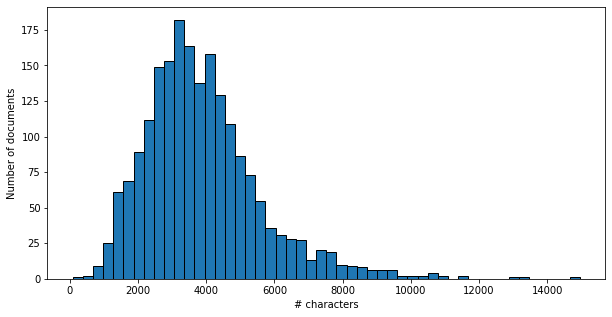

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist([len(x) for x in X_txt], 50, edgecolor='k')
plt.ylabel("Number of documents")
plt.xlabel("# characters")
plt.show()

In [ ]:
index = 1

if y[i] > 0:
  print("Positive review")
else:
  print("Negative review")

print(X_txt[index])

words = set(X_txt[index].split())
print("%i unique words" % len(words))
print(words)

Negative review
the most interesting part of " can't hardly wait " just happens to be not only the most human , but for many of us , the one part that many of us can easily relate to . 
that is the character of denise ( lauren ambrose ) , the film's sole sarcastic member who mocks everything that goes on in the film , and at one point sits down on a couch and looks totally bored . 
the film wisely holds over this moment , nicely showing her alienation in the midst of a large high school party . . . almost 
too nicely . 
for some members of the audience ( read : me ) , this is basically a mirror of what's going on with them watching this film . 
we sit there wondering why we've even bothered to see a film about a long high school party we probably never felt the desire to go to in the first place . 
i would actually highly recommend this film if it satirized all of this . 
after all , this film is filled with a bunch of pathetic stereotypes much of which i went to high school with . 
ev

## Naive classifier

Accuracy: 18.4%


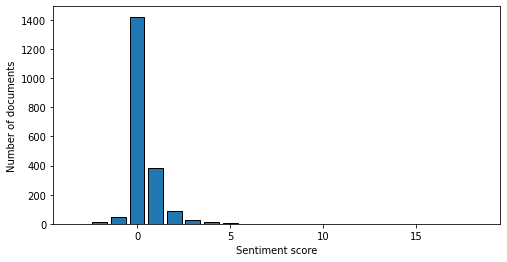

In [ ]:
bad = ["terrible movie", "hideous", "nicolas cage", "charlize"]
good = ["fantastic", "impressive" ,"amazing", "hanks"]

import re
good_regex = "(" + "|".join(good) + ")"
good_regex = re.compile(good_regex)
bad_regex = "(" + "|".join(bad) + ")"
bad_regex = re.compile(bad_regex)

score = [len(good_regex.findall(x))-len(bad_regex.findall(x)) for x in X_txt]

s = np.asarray(score)
s[s>1] = 1
s[s<-1] = -1
print("Accuracy: %.1f%%" % (100*np.mean(s==y)))

plt.figure(figsize=(8, 4))
scores = np.arange(np.min(score), np.max(score)+1)
plt.bar(scores, [np.sum(score==s) for s in scores], edgecolor='k')
plt.ylabel("Number of documents")
plt.xlabel("Sentiment score")
plt.show()

Let's see if we can do this data driven.

In [ ]:
bad = set()
good = set()

# Split data since we are learning from it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_txt, y, test_size=0.1)

# Collect all words for good/bad reviews
for text, label in zip(X_train, y_train):
  unique_words = set(text.split())
  if label == 1:
    good.update(unique_words)
  else:
    bad.update(unique_words)

# Filter out non-alphanumeric characters
good = set([e for e in good if e.isalpha()])
bad = set([e for e in bad if e.isalpha()])

# Ensure disjunctness
bad.difference_update(good)
good.difference_update(bad)

print("Good:", good)
print("Bad:", bad)

Good: {'engulfs', 'touch', 'rain', 'suspenders', 'aggravatingly', 'bandages', 'badly', 'shawshank', 'booth', 'duetting', 'presides', 'surgery', 'shout', 'pods', 'pansies', 'velocity', 'adorably', 'candle', 'fundamentals', 'increases', 'prerogative', 'transcripts', 'only', 'chloe', 'condemnation', 'bending', 'feral', 'emerge', 'technicalities', 'skit', 'paced', 'professors', 'tumbles', 'guilt', 'brown', 'deserves', 'module', 'redman', 'lacing', 'polley', 'october', 'uneducated', 'flushes', 'probes', 'cutely', 'plethora', 'tense', 'riches', 'smallish', 'impressive', 'materialize', 'robotically', 'dimensionality', 'scratched', 'backfires', 'greater', 'diplomatic', 'outshine', 'identifies', 'easton', 'afterwards', 'sufis', 'pessimism', 'viciously', 'mucho', 'despite', 'chereau', 'dosage', 'derides', 'louiso', 'sturm', 'superweapon', 'regularly', 'resignation', 'snubs', 'penal', 'undiluted', 'nigel', 'bulging', 'placeholders', 'eggs', 'woods', 'hops', 'severely', 'newsweek', 'lude', 'revolv

Classifying reviews: 100%|██████████| 200/200 [00:45<00:00,  4.37it/s]


Accuracy: 47.0%


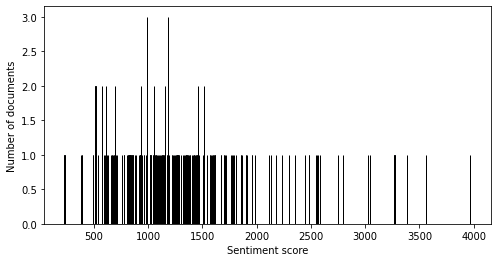

In [ ]:
good_regex = "(" + "|".join(good) + ")"
good_regex = re.compile(good_regex)
bad_regex = "(" + "|".join(bad) + ")"
bad_regex = re.compile(bad_regex)

from tqdm import tqdm
score = list()
for x in tqdm(X_test, desc='Classifying reviews'):
  score.append(len(good_regex.findall(x))-len(bad_regex.findall(x)))

s = np.asarray(score)
s[s>1] = 1
s[s<-1] = -1
print("Accuracy: %.1f%%" % (100*np.mean(s==y_test)))

plt.figure(figsize=(8, 4))
scores = np.arange(np.min(score), np.max(score)+1)
plt.bar(scores, [np.sum(score==s) for s in scores], edgecolor='k')
plt.ylabel("Number of documents")
plt.xlabel("Sentiment score")
plt.show()

## Data driven classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_txt)
X = vectorizer.transform(X_txt)
X[X>1] = 1
X = np.asarray(X.todense())
words = np.asarray(vectorizer.get_feature_names())

In [ ]:
print(words[2000:2010])
print(X[:10, 2000:2010])
for w in ['dolphin', 'the', 'coffee', 'shelob']:
  print("'%s' in words: %s" %(w, w in words))

['anvil' 'anway' 'anxieties' 'anxiety' 'anxious' 'anxiously' 'any' 'anya'
 'anybody' 'anyhoo']
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
'dolphin' in words: True
'the' in words: True
'coffee' in words: True
'shelob' in words: False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

estimator = MultinomialNB()
y_pred = estimator.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 200 points : 34


## Comparing different estimators

In [ ]:
from sklearn.model_selection import cross_val_score

estimator = MultinomialNB()
nb_scores = cross_val_score(estimator, X, y, cv=10, n_jobs=-1)

print("Naive Bayes estimator accuracy: %0.2f (+/- %0.2f)" % (nb_scores.mean(), nb_scores.std() * 1.96))

Naive Bayes estimator accuracy: 0.82 (+/- 0.05)


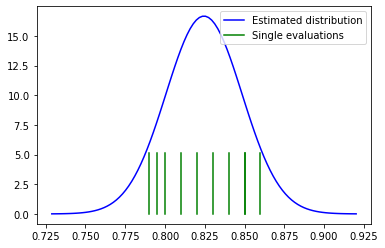

In [ ]:
from scipy.stats import norm

x = np.linspace(nb_scores.mean()-4*nb_scores.std(), nb_scores.mean()+4*nb_scores.std(), 100)
curve = norm(nb_scores.mean(), nb_scores.std()).pdf(x)

plt.figure()
plt.plot(x, curve, 'blue', label="Estimated distribution")
for i, score in enumerate(nb_scores):
  if i==0:
    plt.plot(score*np.ones(2), [0, curve.mean()], 'green', label="Single evaluations")
  else:
    plt.plot(score*np.ones(2), [0, curve.mean()], 'green')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

estimator = LinearSVC(C=1)
svc_scores = cross_val_score(estimator, X, y, cv=10, n_jobs=-1)

print("Linear SVC estimator accuracy: %0.2f (+/- %0.2f)" % (svc_scores.mean(), svc_scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Linear SVC estimator accuracy: 0.85 (+/- 0.05)


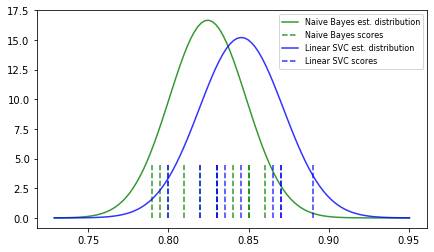

In [ ]:
from scipy.stats import norm

x = np.linspace(min(nb_scores.mean()-4*nb_scores.std(), svc_scores.mean()-4*svc_scores.std()), 
                max(nb_scores.mean()+4*nb_scores.std(), svc_scores.mean()+4*svc_scores.std()), 100)

plt.figure(figsize=(7, 4))
for scores, c, name in zip([nb_scores, svc_scores], ['green', 'blue'], ['Naive Bayes', 'Linear SVC']):
  curve = norm(scores.mean(), scores.std()).pdf(x)
  plt.plot(x, curve, c, label="%s est. distribution" % name, alpha=.8)
  for i, score in zip(range(len(scores)), scores):
    if i==0:
      plt.plot(score*np.ones(2), [0, curve.mean()], c, linestyle='dashed', label="%s scores" % name, alpha=.8)
    else:
      plt.plot(score*np.ones(2), [0, curve.mean()], c, linestyle='dashed', alpha=.8)
plt.legend(fontsize=8)
plt.show()